In [6]:
import numpy as np
import pandas as pd

In [7]:
df= pd.read_csv('/content/email.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
df.shape

(5573, 2)

In [9]:
#1. Data cleaning
#2. EDA
#3. Text Preprocessing
#4. Model building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deploy

## **1. Data Cleaning**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df = df.drop(df.index[-1])

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
#missing values
df.isnull().sum()

,0
Category,0
Message,0


In [14]:
#check for duplicate values
df.duplicated().sum()

np.int64(415)

In [15]:
#remove duplicates
df= df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5157, 2)

## **2. EDA**

In [18]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['Category'].value_counts()

,count
Category,
0,4516
1,641


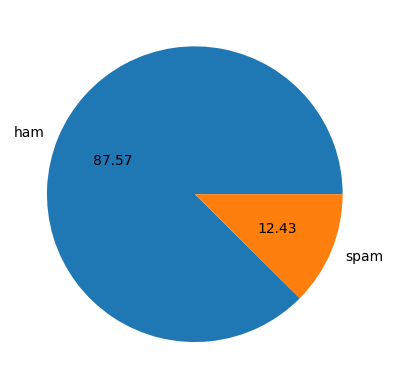

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [21]:
#data is imbalanced

In [22]:
import nltk

In [23]:
pip install nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters']= df['Message'].apply(len)
df.head()

/tmp/ipython-input-2642039307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']= df['Message'].apply(len)


,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#number of words
import nltk
nltk.download('punkt_tab')
df['num_words']= df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/tmp/ipython-input-2691025284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']= df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
#num of sentences
df['num_sentences']= df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

/tmp/ipython-input-3078393703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']= df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#ham
df[df['Category']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#spam
df[df['Category']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

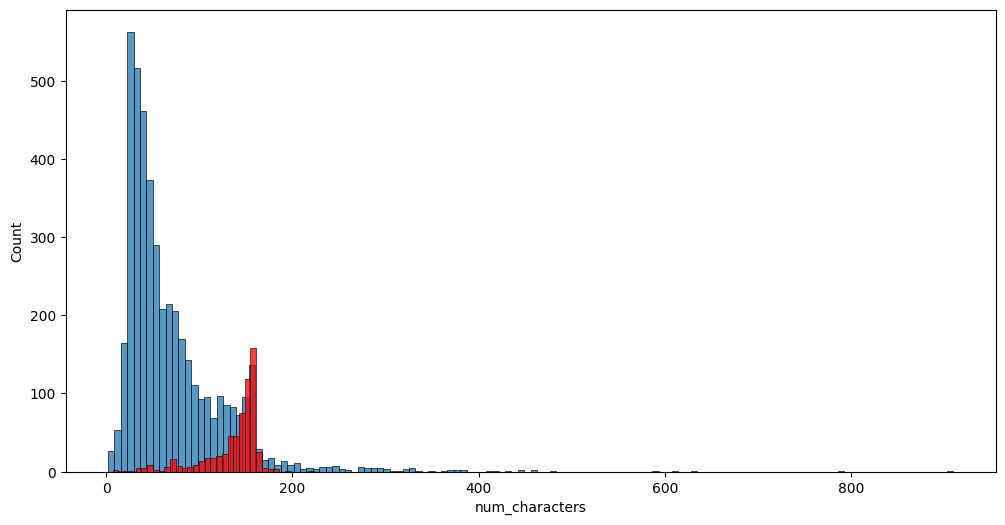

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['num_characters'])
sns.histplot(df[df['Category']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

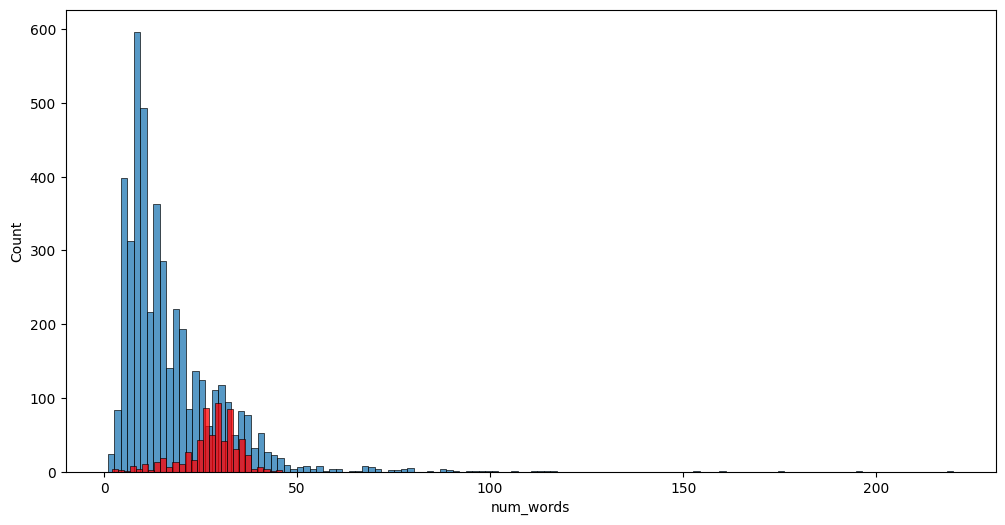

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['num_words'])
sns.histplot(df[df['Category']==1]['num_words'], color='red')

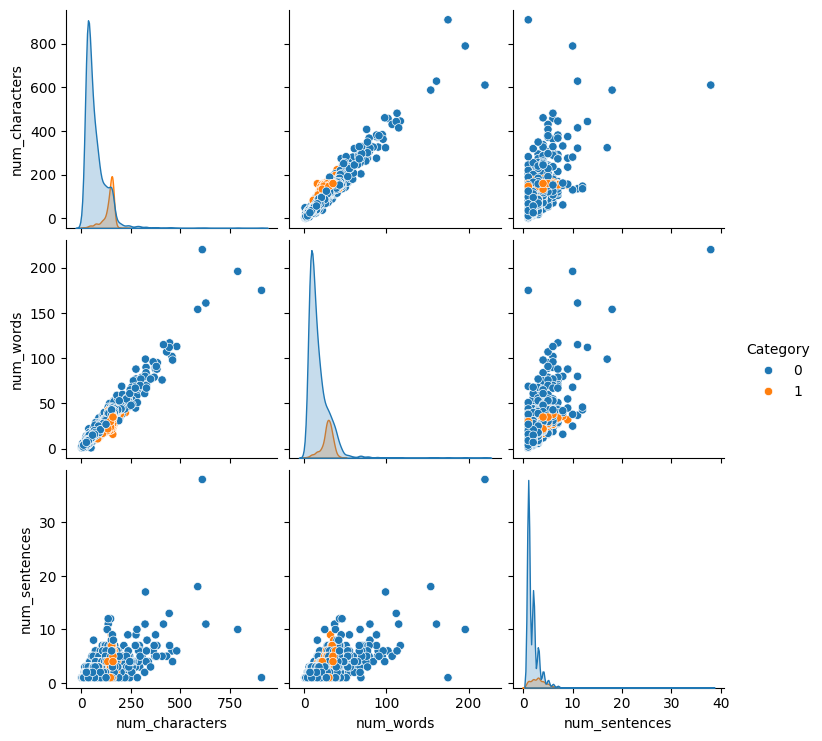

In [34]:
sns.pairplot(df, hue='Category')

<Axes: >

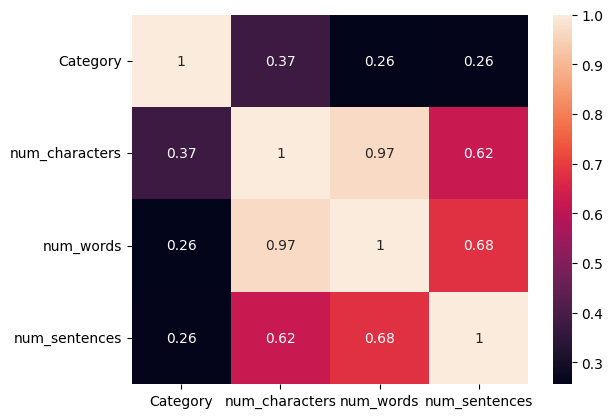

In [35]:
sns.heatmap(df[['Category','num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

# **3.Data Preprocessing**
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [36]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
transform_text('Hi how Are you Jobanpreet?')

'hi jobanpreet'

In [39]:
transform_text('Did you like my presentation on ML?')

'like present ml'

In [40]:
transform_text(' I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [41]:
df['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [42]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... ')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [44]:
df['transform_text'] = df['Message'].apply(transform_text)

/tmp/ipython-input-3040146943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text'] = df['Message'].apply(transform_text)


In [45]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [47]:
spam_wc = wc.generate(df[df['Category']==1]['transform_text'].str.cat(sep=" "))

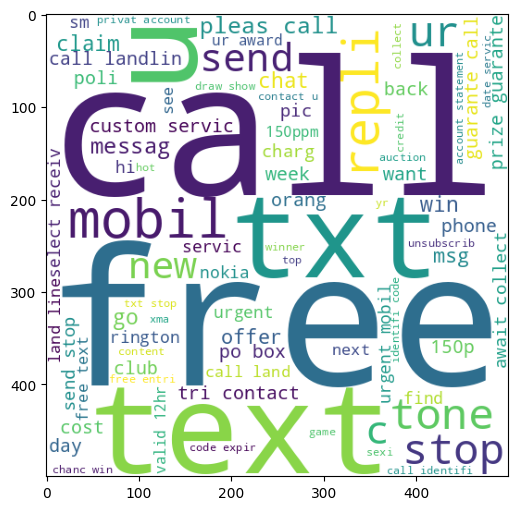

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['Category']==0]['transform_text'].str.cat(sep=" "))

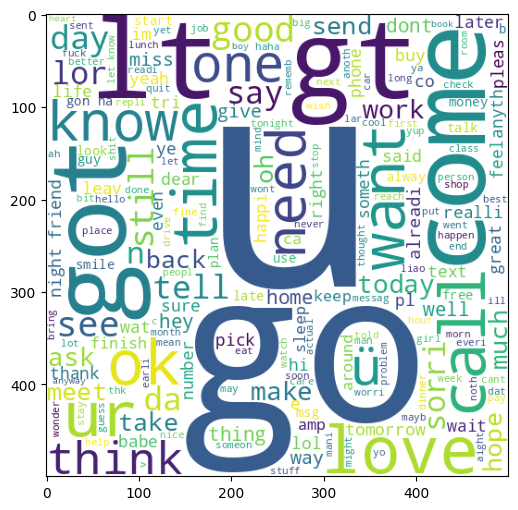

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
spam_corpus = []
for msg in df[df['Category']==1]['transform_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [53]:
len(spam_corpus)

9781

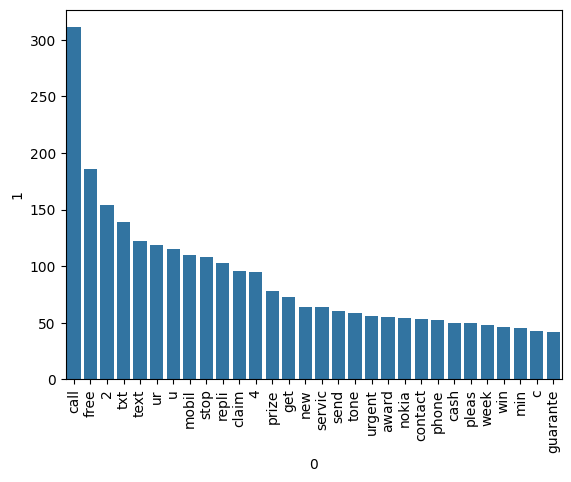

In [54]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=most_common_words[0], y=most_common_words[1])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
ham_corpus = []
for msg in df[df['Category']==0]['transform_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)

In [56]:
len(ham_corpus)

35940

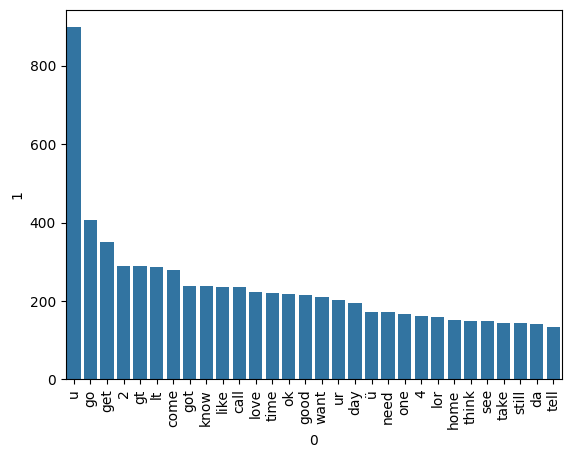

In [57]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=most_common_words[0], y=most_common_words[1])
plt.xticks(rotation='vertical')
plt.show()

## **4. Model Building**

In [58]:
#Text vectorization
#using bag of Words
df.head()

,Category,Message,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv  = CountVectorizer()
Tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = Tfidf.fit_transform(df['transform_text']).toarray()

In [61]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [62]:
#appending the num _character col to X
X = np.hstack((X, df['num_characters'].values.reshape(-1,1)))

In [63]:
X.shape

(5157, 3001)

In [64]:
y = df['Category'].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8827519379844961
[[800 105]
 [ 16 111]]
0.5138888888888888


In [71]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.939922480620155
[[905   0]
 [ 62  65]]
1.0


In [72]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9825581395348837
[[903   2]
 [ 16 111]]
0.9823008849557522


In [73]:
#Tfidf ---> mnb

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [76]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [77]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [78]:
train_classifier(svc, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.876937984496124, 0.0)

In [79]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  SVC
Accuracy -  0.876937984496124
Precision -  0.0
For  KN
Accuracy -  0.9321705426356589
Precision -  0.7209302325581395
For  NB
Accuracy -  0.939922480620155
Precision -  1.0
For  DT
Accuracy -  0.9573643410852714
Precision -  0.9368421052631579
For  LR
Accuracy -  0.9641472868217055
Precision -  0.9591836734693877
For  RF
Accuracy -  0.9757751937984496
Precision -  1.0
For  AdaBoost
Accuracy -  0.9515503875968992
Precision -  0.9052631578947369
For  BgC
Accuracy -  0.9728682170542635
Precision -  0.9541284403669725
For  ETC
Accuracy -  0.9806201550387597
Precision -  1.0
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9354838709677419
For  xgb
Accuracy -  0.9728682170542635
Precision -  0.9714285714285714


In [80]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [81]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.939922,1.000000
8,ETC,0.980620,1.000000
5,RF,0.975775,1.000000
10,xgb,0.972868,0.971429
4,LR,0.964147,0.959184
7,BgC,0.972868,0.954128
3,DT,0.957364,0.936842
9,GBDT,0.955426,0.935484
6,AdaBoost,0.951550,0.905263
1,KN,0.932171,0.720930


In [82]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [83]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.939922
1,ETC,Accuracy,0.980620
2,RF,Accuracy,0.975775
3,xgb,Accuracy,0.972868
4,LR,Accuracy,0.964147
5,BgC,Accuracy,0.972868
6,DT,Accuracy,0.957364
7,GBDT,Accuracy,0.955426
8,AdaBoost,Accuracy,0.951550
9,KN,Accuracy,0.932171


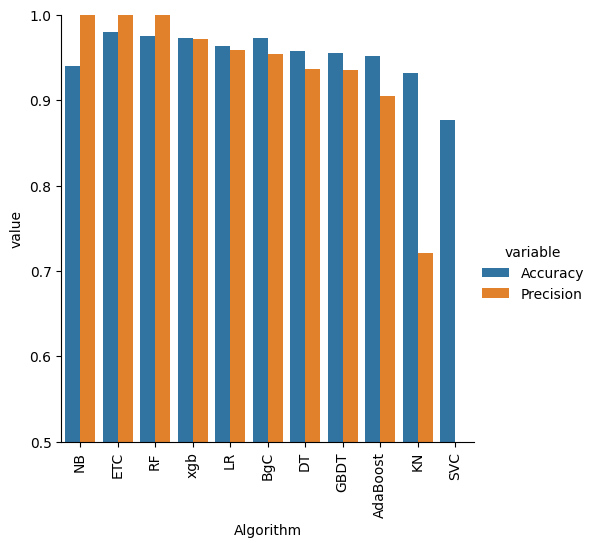

In [84]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()

In [85]:
# model improvement
#1. change the max_features parameter of TfIdf

In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [88]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [89]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [90]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,NB,0.939922,1.000000,0.939922,1.000000,0.939922,1.000000
1,ETC,0.980620,1.000000,0.980620,1.000000,0.980620,1.000000
2,RF,0.975775,1.000000,0.975775,1.000000,0.975775,1.000000
3,xgb,0.972868,0.971429,0.972868,0.971429,0.972868,0.971429
4,LR,0.964147,0.959184,0.964147,0.959184,0.964147,0.959184
5,BgC,0.972868,0.954128,0.972868,0.954128,0.972868,0.954128
6,DT,0.957364,0.936842,0.957364,0.936842,0.957364,0.936842
7,GBDT,0.955426,0.935484,0.955426,0.935484,0.955426,0.935484
8,AdaBoost,0.951550,0.905263,0.951550,0.905263,0.951550,0.905263
9,KN,0.932171,0.720930,0.932171,0.720930,0.932171,0.720930


In [91]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,NB,0.939922,1.000000,0.939922,1.000000
1,ETC,0.980620,1.000000,0.980620,1.000000
2,RF,0.975775,1.000000,0.975775,1.000000
3,xgb,0.972868,0.971429,0.972868,0.971429
4,LR,0.964147,0.959184,0.964147,0.959184
5,BgC,0.972868,0.954128,0.972868,0.954128
6,DT,0.957364,0.936842,0.957364,0.936842
7,GBDT,0.955426,0.935484,0.955426,0.935484
8,AdaBoost,0.951550,0.905263,0.951550,0.905263
9,KN,0.932171,0.720930,0.932171,0.720930


In [92]:
#Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [93]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [94]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [95]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.937984496124031
Precision 1.0


In [96]:
#Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [97]:
from sklearn.ensemble import StackingClassifier

In [98]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [99]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9835271317829457
Precision 0.9910714285714286


In [102]:
import pickle
pickle.dump(Tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))

In [103]:
import os
print(os.listdir())
# You should see 'vectorizer.pkl' and 'model.pkl' in the output.

['.config', 'email.csv', 'vectorizer.pkl', 'sample_data', 'model.pkl']


In [105]:
import pickle
import os

# Assuming your files are in the current working directory (/content)
try:
    with open('vectorizer.pkl', 'rb') as vectorizer_file:
        loaded_tfidf = pickle.load(vectorizer_file)

    with open('model.pkl', 'rb') as model_file:
        loaded_mnb = pickle.load(model_file)

    print("Vectorizer and Model loaded successfully!")

except Exception as e:
    print(f"Error loading files: {e}")

Vectorizer and Model loaded successfully!


In [110]:
import re
import numpy as np

def preprocess_text(text):
    # This must match the preprocessing steps from your training phase
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

def classify_email(email_text):
    clean_text = preprocess_text(email_text)
    # The loaded_tfidf and loaded_mnb variables must be available from step 1
    email_vector = loaded_tfidf.transform([clean_text])

    # Calculate the number of characters and append it to the feature vector
    num_characters = len(email_text)
    email_vector = np.hstack((email_vector.toarray(), np.array([[num_characters]])))

    prediction = loaded_mnb.predict(email_vector)[0]

    if prediction == 1:
        return "SPAM 🚨"
    else:
        return "HAM ✅"

In [111]:
# Assuming X_train and y_train are available from your previous steps
loaded_mnb.fit(X_train, y_train)

MultinomialNB()

In [112]:
# Test your classifier!
email_to_check = "Dear valued customer, you have been selected for an exclusive offer. Click here!"
result = classify_email(email_to_check)
print(f"The email is classified as: {result}")

The email is classified as: HAM ✅
